## Use Case : 
In today's fast-paced world, It's essential to stay updated with the latest news and information. However, going through multiple news articles can be time consuming. To help you save time and get quick overview of the important news article let's build **News Article Summarizer**



## Flow Chart
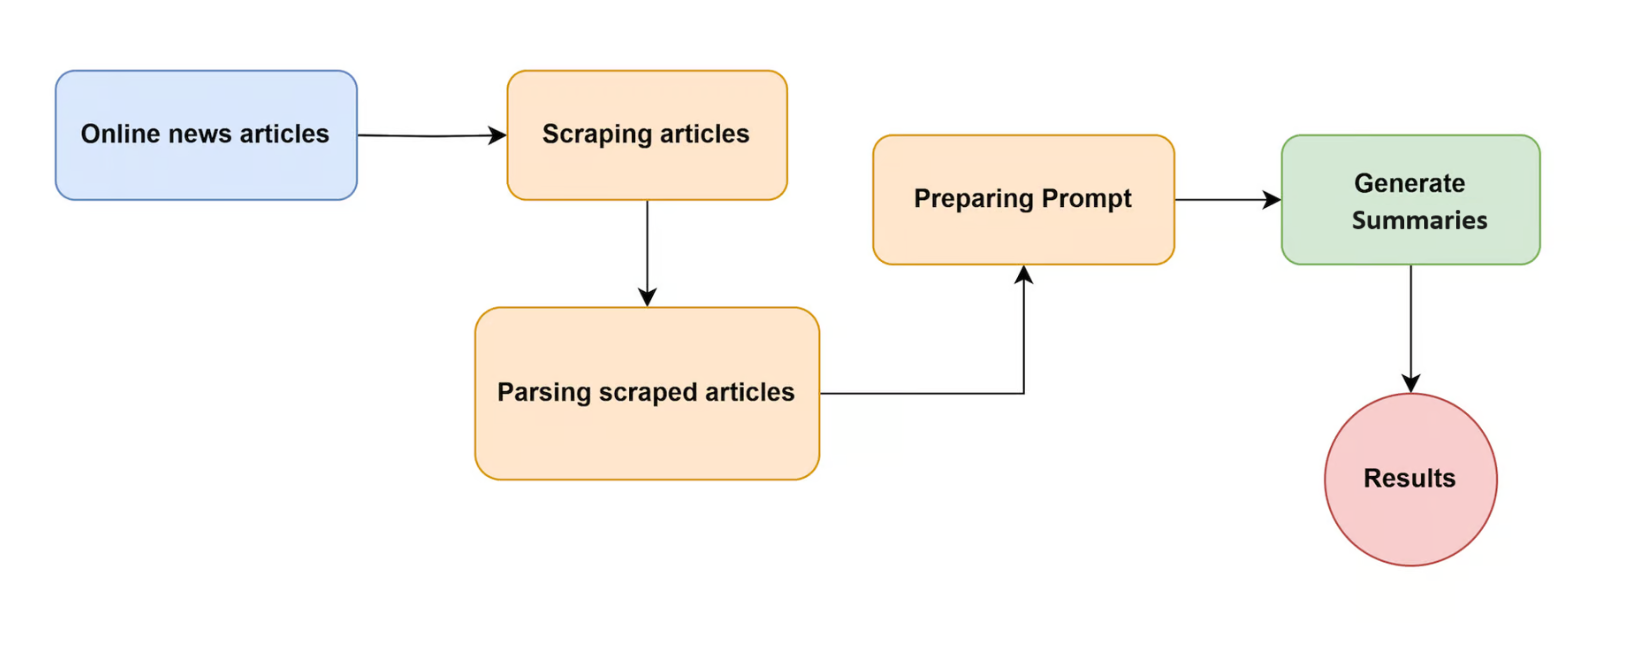

## Install required Libraries
- langchian
- google-generativeai
- newspaper3k
- chromadb

In [1]:
!pip install -q newspaper3k 

In [11]:
import os
from dotenv import load_dotenv
from newspaper import Article
import requests
load_dotenv()

True

## Scrape Article

In [9]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}


In [10]:
article_url = "https://www.artificialintelligence-news.com/2022/01/25/meta-claims-new-ai-supercomputer-will-set-records/"


In [12]:
session = requests.Session()

In [14]:
try:
    response = session.get(article_url, headers = headers , timeout = 10)

    if response.status_code == 200:
        article = Article(article_url)
        article.download()
        article.parse()
    
        print(f"Title: {article.title}")
        print()
        print(f"Text: {article.text}")
    else:
        print(f"failed to fetch article at {article_url}")
except Exception as e:
    print(f"Error occured at : {e}")

Title: Meta claims its new AI supercomputer will set records

Text: Ryan Daws is a senior editor at TechForge Media, with a seasoned background spanning over a decade in tech journalism. His expertise lies in identifying the latest technological trends, dissecting complex topics, and weaving compelling narratives around the most cutting-edge developments. His articles and interviews with leading industry figures have gained him recognition as a key influencer by organisations such as Onalytica. Publications under his stewardship have since gained recognition from leading analyst houses like Forrester for their performance. Find him on X (@gadget_ry) or Mastodon (@gadgetry@techhub.social)

Meta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.

The supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete. However, Meta’s researchers have already begun using it for training large natural language processing 

In [16]:
article_title = article.title
article_text = article.text

## Preparing Prompt

In [17]:
from langchain.schema import HumanMessage

In [18]:
templeate = '''You are good in article summarization.
Here is the article to summarize.
----------------
Title:{article_title}

{article_text}
----------------

write a summary of the given article.
'''

In [19]:
prompt = templeate.format(article_title = article_title,article_text =  article_text)

In [20]:
messages = [HumanMessage(content=prompt)]

## Generate Summary

In [22]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [23]:
chat = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=os.getenv("GOOGLE_GEMINI_API"), temperature=0)

In [24]:
summary = chat(messages=messages)

### Result

In [25]:
print(summary.content)

Meta has unveiled the AI Research SuperCluster (RSC), an AI supercomputer that it claims will be the world's fastest upon completion in mid-2022. RSC is designed to train large natural language processing and computer vision models with trillions of parameters. It is expected to be 20x faster than Meta's current clusters and 9x faster at running the NVIDIA Collective Communication Library. RSC will enable Meta to use real-world examples from its production systems in training, enhancing research for tasks like identifying harmful content on its platforms. Meta emphasizes that RSC prioritizes performance, reliability, security, and privacy at an unprecedented scale.


### Bullet Point Summary 

In [26]:
bullet_templeate = '''You are good in article summarization so give summary in bullet points.
Here is the article to summarize.
----------------
Title:{article_title}

{article_text}
----------------

write a summary of the given article in bullet points.
'''

In [27]:
prompt = bullet_templeate.format(article_title=article_title,article_text = article_text)

In [29]:
summary = chat([HumanMessage(content=prompt)])

In [30]:
print(summary.content)

- Meta unveils AI Research SuperCluster (RSC), claiming it will be the world's fastest supercomputer.
- RSC is designed for training large natural language processing (NLP) and computer vision models.
- Upon completion in mid-2022, RSC aims to train models with trillions of parameters.
- RSC is expected to be 20x faster than Meta's current clusters for production.
- It is estimated to be 9x faster at running NVIDIA Collective Communication Library (NCCL) and 3x faster at training large-scale NLP workflows.
- RSC incorporates security and privacy controls to allow Meta to use real-world examples from its production systems in training.
- Meta believes RSC is the first supercomputer to address performance, reliability, security, and privacy at such a scale.
